# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Importando bibliotecas

In [2]:
import seaborn as sns
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [3]:
conn = psycopg2.connect(host="localhost",database="FINAL_CarroBD", user="postgres", password="101417ha")

## Obtendo dados do database com Pandas

# Relatório 1

### OBJETIVO: OBTER DADOS SOBRE A SITUAÇÃO DO CARRO DO CLIENTE.
OS DADOS RELACIONAM NOME DO MOTORISTA, PLACA DO VEÍCULO E NOME DO SENSOR, JUNTO COM O ESTADO DA PEÇA DO RESPECTIVO VEÍCULO ANALISADO PELO SENSOR.

CODIFICAÇÃO PARA OBTENÇÃO DO RESULTADO:

In [12]:
test = pd.read_sql_query("""
        SELECT NOME, PLACA, NOME_SENSOR,ESTADO_PECA FROM PESSOA
		INNER JOIN VEICULO ON (PESSOA.ID_PESSOA = VEICULO.FK_PESSOA_ID_PESSOA)
		INNER JOIN SENSORES ON (VEICULO.ID_VEICULO = SENSORES.FK_VEICULO_ID_VEICULO)
		INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
        
		GROUP BY NOME, PLACA, NOME_SENSOR,ESTADO_PECA
		LIMIT 20;
                            """,conn)

In [13]:
test

,nome,placa,nome_sensor,estado_peca
0,Gessica Reis,XXJ-1892,cb45,1
1,Vitória,KKR-6652,cb34,1
2,Gessica,TOE-1018,cs19,1
3,Vitorino,DNO-1839,dev36,0
4,Naiara Azevedo,SDR-2856,dev46,0
5,Sebastião,XAD-2192,ac30,0
6,Adriana,DNU-9526,tla1,1
7,Sebastião,XAD-2192,dev30,0
8,Alexandre,LHJ-5783,fa5,1
9,Thais Mazioli,ZLS-6228,pa48,0


ESPECIFICAÇÃO DA BUSCA: DADOS SOBRE A SITUAÇÃO DO CARRO DE UM DETERMINADO USUÁRIO.

In [201]:
especif = pd.read_sql_query("""SELECT NOME, PLACA, NOME_SENSOR,ESTADO_PECA FROM PESSOA
		INNER JOIN VEICULO ON (PESSOA.ID_PESSOA = VEICULO.FK_PESSOA_ID_PESSOA)
		INNER JOIN SENSORES ON (VEICULO.ID_VEICULO = SENSORES.FK_VEICULO_ID_VEICULO)
		INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
        WHERE NOME = 'Adriana'
		GROUP BY NOME, PLACA, NOME_SENSOR,ESTADO_PECA""",conn)

In [202]:
especif

,nome,placa,nome_sensor,estado_peca
0,Adriana,DNU-9526,abs1,0
1,Adriana,DNU-9526,ac1,1
2,Adriana,DNU-9526,cb1,0
3,Adriana,DNU-9526,cb1,1
4,Adriana,DNU-9526,cs1,1
5,Adriana,DNU-9526,dev1,0
6,Adriana,DNU-9526,f1,0
7,Adriana,DNU-9526,f1,1
8,Adriana,DNU-9526,fa1,0
9,Adriana,DNU-9526,fe1,0


# Relatorio2

### Objetivo: MOSTRAR QUAIS COMPONENTES DO CARRO QUEBRAM COM MAIS FREQUÊNCIA;
OS DADOS RELACIONAM DESCRICAO DO ERRO IDENTIFICADO PELO SENSOR COM AS FALHAS REGISTRADAS NO SISTEMA, MOSTRANDO QUAL DOS COMPONENTES DO VEÍCULO APRESENTOU MAIS FALHA.

CÓDIGO PARA OBTENÇÃO DE RESULTADO:

In [203]:
result = pd.read_sql_query("""
                            SELECT DESCRICAO, COUNT(DESCRICAO) AS QUEBRAS FROM SENSORES
	INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
	WHERE ESTADO_PECA = 1
	GROUP BY DESCRICAO
    ORDER BY QUEBRAS DESC;
                            """,conn)

In [204]:
result

,descricao,quebras
0,Fróis de milha,32
1,Cinto de segurança,32
2,Faróis,31
3,Faról alto,29
4,Freio de estacionamento,29
5,Ar condicionado,29
6,Carga da bateria,27
7,Nível de combustível,27
8,Temperatura do líquido de arrefecimento,26
9,Pressão do fluido do freio,26


GRÁFICO DA TABELA ACIMA REPRESETADO POR ESQUEMA DE COR. (QUANTO MAIS ESCURO, MAIOR É A INCIDÊNCIA).

In [196]:
df = pd.DataFrame(result)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)


,descricao,quebras
0,Fróis de milha,32
1,Cinto de segurança,32
2,Faróis,31
3,Faról alto,29
4,Freio de estacionamento,29
5,Ar condicionado,29
6,Carga da bateria,27
7,Nível de combustível,27
8,Temperatura do líquido de arrefecimento,26
9,Pressão do fluido do freio,26


## Relatório 3

### OBJETIVO: OBTER OS REGISTROS DAS CHAMADAS DE MECÂNICOS POR ESPECIALIZAÇÃO;
OS DADOS RELACIONAM ESPECIALIZACAO DO MECANICO E SUAS ID'S NO SISTEMA, CONTABILIZANDO QUANTAS VEZES A ESPECIALIZAÇÃO FOI CHAMADA DENTRO DO SISTEMA;

CÓDIGO PARA OBTENÇÃO DO RESULTADO

In [197]:
result = pd.read_sql_query("""
                            SELECT ESPECIALIZACAO, COUNT(ESPECIALIZACAO) AS CHAMADAS FROM PESSOA
		INNER JOIN MECANICO ON (PESSOA.ID_PESSOA = MECANICO.FK_PESSOA_ID_PESSOA)
		INNER JOIN CONTRATA ON (MECANICO.FK_PESSOA_ID_PESSOA= CONTRATA.FK_MECANICO_FK_PESSOA_ID_PESSOA)
		GROUP BY ESPECIALIZACAO
		;
                            """,conn)

In [198]:
result

,especializacao,chamadas
0,Borracharia,35
1,Lanterneiro,42
2,Mecânica,46
3,Elétrica,33


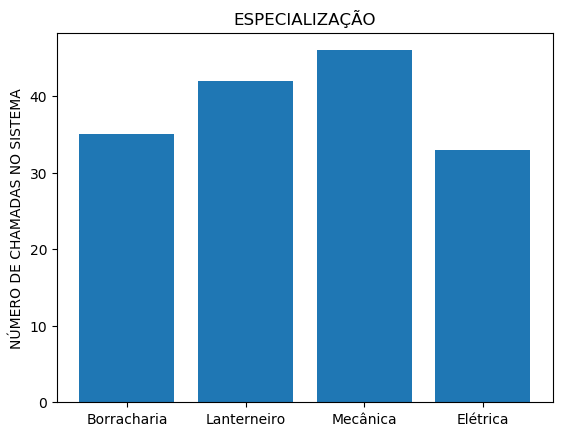

In [199]:
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.especializacao)
y_pos = np.arange(len(objects))
performance = list(df.chamadas)
 
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('NÚMERO DE CHAMADAS NO SISTEMA')
plt.title('ESPECIALIZAÇÃO')
 
plt.show()

## Relatório 4

### OBJETIVO: OBTER OS MODELOS QUE MAIS APRESENTARAM PEÇAS COM FALHA REGISTRADAS NO SISTEMA.
OS DADOS RELACIONAM MODELOS REGISTRADOS NO SISTEMA COM QUANTIDADES DE FALHAS DE SEUS COMPONENTES, INDICANDO QUAL MODELO TEVE MAIS FALHA.

CODIFICAÇÃO PARA OBTENÇÃO DO RESULTADO:

In [200]:
result = pd.read_sql_query("""
                            SELECT MODELO_VEICULO, ESTADO_PECA, count(*) AS NUMERO_FALHAS FROM VEICULO
		INNER JOIN MODELO ON (VEICULO.FK_MODELO_ID_MODELO = MODELO.ID_MODELO)
		INNER JOIN SENSORES ON (VEICULO.ID_VEICULO = SENSORES.FK_VEICULO_ID_VEICULO)
		INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
		WHERE ESTADO_PECA = 1 GROUP BY MODELO_VEICULO, ESTADO_PECA;
                            """,conn)

In [83]:
result

,modelo_veiculo,estado_peca,numero_falhas
0,POP 110I,1,32
1,BENTLEY CONTINENTAL FLYING SPUR,1,17
2,ACCELO,1,47
3,CB TWISTER,1,24
4,CAMARO,1,30
5,DB9,1,50
6,MARRUA X5,1,26
7,CELER,1,35
8,300C,1,32
9,I3,1,12


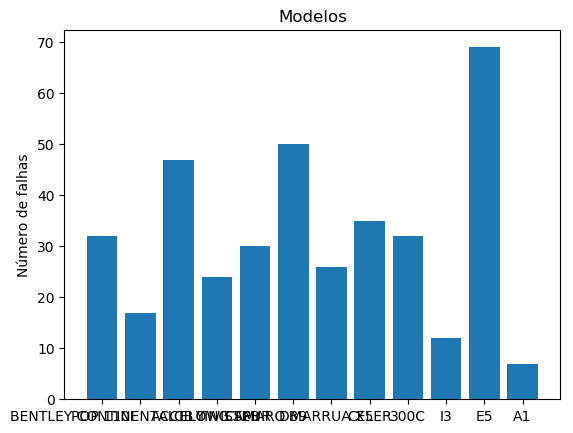

In [84]:
df = pd.DataFrame(result)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.modelo_veiculo)
y_pos = np.arange(len(objects))
performance = list(df.numero_falhas)
 
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Número de falhas')
plt.title('Modelos')
 
plt.show()

# RELATÓRIO 5

## Objetivo: Definir um perfil dos motoristas de acordo com a idade.
OS DADOS RELACIONAM IDADE DOS MOTORISTAS COM NÚMERO DE FALHAS NOS SEUS VEÍCULOS, PODENDO ASSIM, GERAR A POSSIBILIDADE DE TRAÇAR UM PERFIL DOS MOTORISTAS DE ACORDO COM A IDADE E RESPECTIVAS FALHAS NOS SEUS VEÍCULOS.

In [192]:
result = pd.read_sql_query("""
                            SELECT 
	COUNT (CASE WHEN  date_part('year',age(data_nascimento)) BETWEEN 18 AND 25 THEN 'ate 25' END) AS "18 A 25",
	COUNT (CASE WHEN  date_part('year',age(data_nascimento)) BETWEEN 26 AND 35 THEN 'de 26 a 35' END) AS "26 A 35",
	COUNT (CASE WHEN  date_part('year',age(data_nascimento)) BETWEEN 36 AND 50 THEN 'de 36 a 50' END) AS "36 A 50",
	COUNT (CASE WHEN  date_part('year',age(data_nascimento)) BETWEEN 50 AND 120 THEN 'de 50+' END) AS "50 PRA CIMA"
							  
	FROM PESSOA
	iNNER JOIN VEICULO ON (PESSOA.ID_PESSOA = VEICULO.FK_PESSOA_ID_PESSOA)
	INNER JOIN SENSORES ON (VEICULO.ID_VEICULO = SENSORES.FK_VEICULO_ID_VEICULO)
	INNER JOIN GERAM ON (SENSORES.ID_SENSOR = GERAM.FK_SENSORES_ID_SENSOR)
	WHERE ESTADO_PECA = 0;
                            """,conn)

In [193]:
result

,18 A 25,26 A 35,36 A 50,50 PRA CIMA
0,85,91,165,35


A TABELA MOSTRA QUE O MAIOR NÚMERO DE FALHA ESTÁ ASSOCIADO AOS MOTORISTAS COM FAIXA ETÁRIA DE 36 A 50 ANOS.

# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>